In [1]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2, 
                                        zoom_range=0.2,
                                        horizontal_flip=True)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (32,32),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 30 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(32,32),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 30 images belonging to 2 classes.


In [11]:
vgg = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1,
    classifier_activation="softmax",
)

83697664/83683744 [==============================] - 12s 0us/step


In [12]:
for layer in vgg.layers:
  layer.trainable = False

In [13]:
x = tf.keras.layers.GlobalMaxPooling2D()(vgg.output)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # create a model object
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
model.summary()

# # tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [14]:
history = model.fit(
  x_train,
  validation_data=x_test,
  epochs=35,
)

Epoch 1/35
8/8 [==============================] - 33s 3s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/35
8/8 [==============================] - 1s 114ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6948 - val_accuracy: 0.4667
Epoch 3/35
8/8 [==============================] - 1s 86ms/step - loss: 0.6947 - accuracy: 0.5333 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 4/35
8/8 [==============================] - 1s 94ms/step - loss: 0.6927 - accuracy: 0.5333 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 5/35
8/8 [==============================] - 1s 113ms/step - loss: 0.6891 - accuracy: 0.5667 - val_loss: 0.6943 - val_accuracy: 0.5333
Epoch 6/35
8/8 [==============================] - 1s 107ms/step - loss: 0.6923 - accuracy: 0.5667 - val_loss: 0.6938 - val_accuracy: 0.5333
Epoch 7/35
8/8 [==============================] - 1s 105ms/step - loss: 0.6863 - accuracy: 0.6000 - val_loss: 0.6935 - val_accuracy: 0.5333
Epoch 8/35
8/8 [========

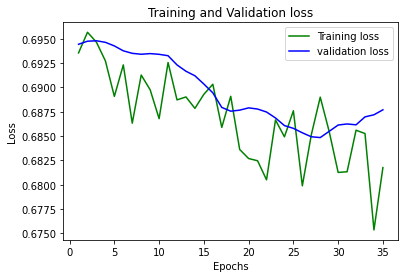

In [15]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

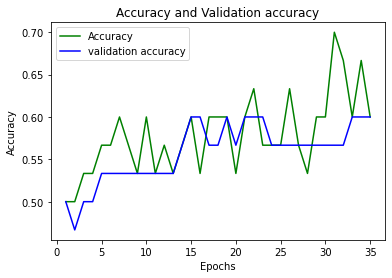

In [16]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,36)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()